# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import models, Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import keras
import time
from numpy.random import seed
seed(25)
tf.random.set_seed(26)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# IMPORTING THE DATAFRAME

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### AN OVERVIEW ON THE DATA BEING USED

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Time    : Number of seconds elapsed between this transaction and the first transaction in the dataset

V1-V28  : Result of a PCA Dimensionality reduction to protect user identities and sensitive features

Amount  : Transaction amount

Class   : 1 for fraudulent transactions, 0 otherwise

# PREPROCESSING THE DATA

- ### SPLITTING THE DATA INTO TRAIN, TEST AND VALIDATION SETS

In [3]:
# Split the data into features (X) and labels (y)
X = df.drop('Class', axis=1).copy()
y = df['Class'].copy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2023)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(159491, 30)
(85443, 30)
(39873, 30)


- ### STANDARDISING OUR DATAFRAME

In [5]:
# Normalize the features
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_val = StandardScaler()
X_val = scaler_val.fit_transform(X_val)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

# BUILDING AN MLP (MULTI-LEVEL PERCEPTRON): A FULLY CONNECTED FEEDFORWARD ARTIFICIAL NEURAL NETWORK

- ### DEFINING THE MODEL

In [6]:
tf.compat.v1.reset_default_graph()

In [7]:
start = time.time()

In [8]:
# Build the model                              
model = Sequential([
    Dense(units=30, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=5, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

It is a non-linear function that takes a real-valued input and outputs a value between 0 and 1, with 0 representing the negative region and 1 representing the positive region. The advantage of using ReLU is that it is fast to compute and can handle a large number of inputs. It is also less prone to the vanishing gradient problem, which is a common issue when training deep neural networks.

The vanishing gradient problem is a phenomenon that occurs when training deep neural networks. As the layers of the network become deeper and more complex, the gradient of the loss function becomes increasingly small, making it difficult for the model to learn. This results in slow convergence and suboptimal solutions.

In binary classification problems, the sigmoid activation function is often the best choice because it produces an output value between 0 and 1, which allows the model to make a clear distinction between the two classes. The sigmoid function is also relatively easy to compute, making it a good choice for deep learning models. In comparison, the softmax activation function is better suited for multi-class classification problems, and the ReLU activation function is better suited for complex non-linear problems.

- ### COMPILING THE MODEL

In [9]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy', 'Precision'])

The binary cross-entropy loss function is a commonly used loss function for binary classification problems. It measures the binary cross-entropy between the predicted output and the ground truth, and is suitable for models that output probabilities. The binary cross-entropy loss function is used when the goal is to minimize the difference between the predicted probability and the actual class label.

In this case, RMSProp (Root Mean Square Propagation) is the best choice because it is well-suited for imbalanced datasets. RMSProp adjusts the learning rate of each parameter based on the magnitude of its gradient, which helps reduce the risk of overfitting and improves the model's ability to generalize to unseen data. In comparison, Adam and Adamax are more suitable for datasets with a larger number of parameters or more complex non-linear problems.

- ### MODEL SUMMARY

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,616
Trainable params: 1,616
Non-trainable params: 0
_________________________________________________________________
None


- ### FITTING THE MODEL

In [11]:
# Train the model
callback_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='min', restore_best_weights=True)

hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, 
callbacks=callback_loss, verbose=2)

# A BATCH SIZE OF 2048 IS USED TO DECREASE THE RUN TIME OF THE MODEL AS LOWER BATCH SIZES CAUSES SIGNIFICANT DELAYS IN RUNTIME.

Epoch 1/100
1247/1247 - 2s - loss: 0.0267 - accuracy: 0.9979 - precision: 0.4326 - val_loss: 0.0052 - val_accuracy: 0.9993 - val_precision: 0.7846 - 2s/epoch - 2ms/step
Epoch 2/100
1247/1247 - 1s - loss: 0.0039 - accuracy: 0.9995 - precision: 0.8642 - val_loss: 0.0051 - val_accuracy: 0.9992 - val_precision: 0.7812 - 1s/epoch - 882us/step
Epoch 3/100
1247/1247 - 1s - loss: 0.0036 - accuracy: 0.9994 - precision: 0.8721 - val_loss: 0.0042 - val_accuracy: 0.9993 - val_precision: 0.7937 - 1s/epoch - 870us/step
Epoch 4/100
1247/1247 - 1s - loss: 0.0033 - accuracy: 0.9995 - precision: 0.8794 - val_loss: 0.0050 - val_accuracy: 0.9993 - val_precision: 0.8033 - 1s/epoch - 902us/step
Epoch 5/100
1247/1247 - 1s - loss: 0.0032 - accuracy: 0.9995 - precision: 0.8872 - val_loss: 0.0051 - val_accuracy: 0.9993 - val_precision: 0.8065 - 1s/epoch - 900us/step
Epoch 6/100
1247/1247 - 1s - loss: 0.0031 - accuracy: 0.9995 - precision: 0.8769 - val_loss: 0.0043 - val_accuracy: 0.9993 - val_precision: 0.8065 

In [12]:
end = time.time()

In [13]:
print("Time taken to define, compile and fit the model is :", round((end-start), 2), "seconds")

Time taken to define, compile and fit the model is : 14.84 seconds


- ### MODEL LOSS CONVERGENCE

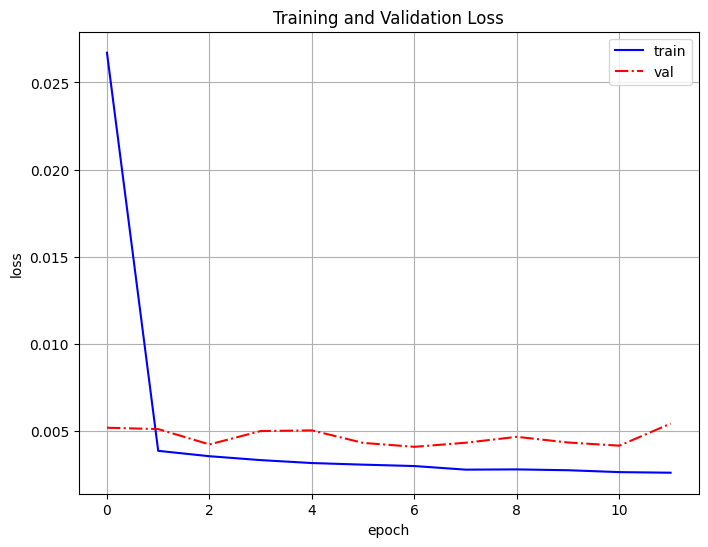

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(hist.history['loss'], linestyle='-', color='blue', label='train')
plt.plot(hist.history['val_loss'], linestyle='-.', color='red', label='val')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(loc='best')
plt.show()

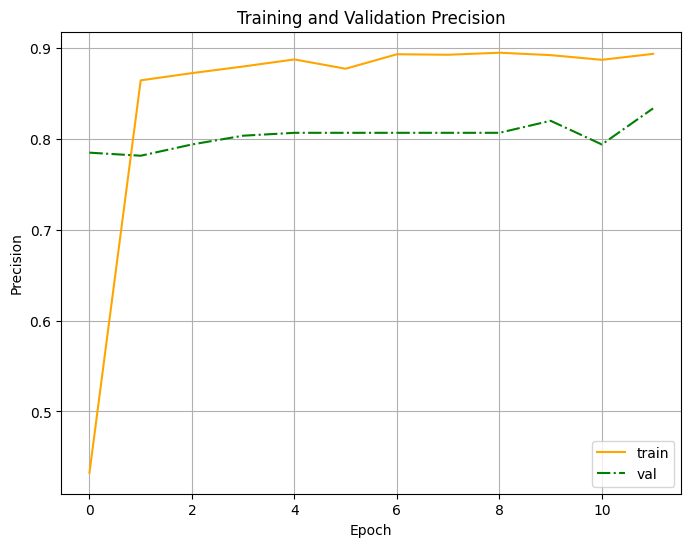

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(hist.history['precision'], linestyle='-', color='orange', label='train')
plt.plot(hist.history['val_precision'], linestyle='-.', color='green', label='val')
plt.title('Training and Validation Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# EVALUATION OF THE MODEL

- ### Accuracy of the Model

In [16]:
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)

print(f'Validation Data Accuracy with our model prediction: {round(val_eval[1]*100, 2)}% With a cost of: {round(val_eval[0]*100, 2)}%')
print(f'Test Data Accuracy with our model prediction: {round(test_eval[1]*100, 2)}% With a cost of: {round(test_eval[0]*100, 2)}%')

Validation Data Accuracy with our model prediction: 99.93% With a cost of: 0.41%
Test Data Accuracy with our model prediction: 99.94% With a cost of: 0.44%


The model.evaluate() function is used to evaluate the performance of a machine learning model. It typically takes two arguments: the input data (often called "X_test" or "test data") and the expected output (often called "y_test" or "test labels"). The input data is used as the input to the model, and the model's predicted output is compared to the expected output.

- ### Precision of the Model on Validation Set

In [17]:
# Evaluate the model
y_pred_val_prec = np.around(model.predict(X_val))
print(classification_report(y_val, y_pred_val_prec))

1247/1247 [==============================] - 1s 550us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39807
           1       0.81      0.76      0.78        66

    accuracy                           1.00     39873
   macro avg       0.90      0.88      0.89     39873
weighted avg       1.00      1.00      1.00     39873



As the output of the sigmoid function is a float between 0 and 1 and not actual binary values around function is used from the numpy library to round the value to the closes integer which is either 0 and 1. i.e, anything below 0.5 is considered as 0 and anything above or equal to 0.5 is taken as 1.

- ### Precision of the Model on Test Set

In [18]:
y_pred_test_prec = np.around(model.predict(X_test))
print(classification_report(y_test, y_pred_test_prec))

2671/2671 [==============================] - 1s 529us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.85      0.76      0.80       146

    accuracy                           1.00     85443
   macro avg       0.92      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



- #### Precision: 
This metric measures the proportion of positive cases that were correctly identified by the model. High precision indicates that the model has a low false positive rate.

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

- #### Recall:
This metric measures the proportion of actual positive cases that were identified by the model. High recall indicates that the model has a low false negative rate.

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

- #### F1-Score:
The F1 score is a good way to balance precision and recall, as it gives a low score if either of them is low.

$$\text{F1 Score} = 2 \times \left( \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \right)$$

- ### ROC-AUC SCORE

In [19]:
y_pred_test_roc = np.around(model.predict(X_test))
print(f'Validation Data ROC_AUC score with our model prediction: {round((roc_auc_score(y_test, y_pred_test_roc))*100, 2)}%')

2671/2671 [==============================] - 1s 550us/step
Validation Data ROC_AUC score with our model prediction: 88.0%


In [20]:
y_pred_val_roc = np.around(model.predict(X_val))
print(f'Validation Data ROC_AUC score with our model prediction: {round((roc_auc_score(y_val, y_pred_val_roc))*100, 2)}%')

1247/1247 [==============================] - 1s 541us/step
Validation Data ROC_AUC score with our model prediction: 87.86%


1247/1247 [==============================] - 1s 508us/step


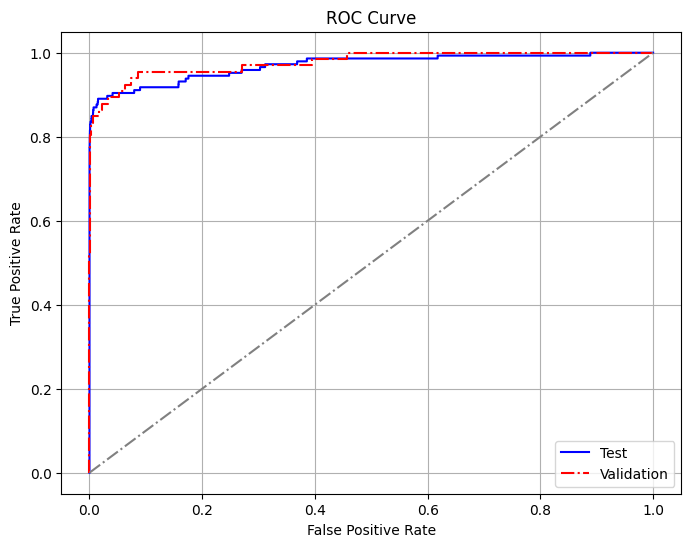

In [127]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# predict probabilities
y_scores_test = model.predict(X_test)
y_scores_val = model.predict(X_val)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_scores_val)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_scores_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, linestyle='solid', color='blue', label='Test')
plt.plot(fpr_val, tpr_val, linestyle='-.', color='red', label='Validation')
plt.plot([0, 1], [0, 1], linestyle='-.', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc='best')
plt.show()

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a metric used to evaluate the performance of a binary classification model. It measures the ability of the model to distinguish between the two classes, and is calculated by determining the area under the ROC curve, which is a plot of the true positive rate against the false positive rate. The ROC AUC score is better than accuracy or precision scores because it takes into account both the true positives and the false positives.

# SAVING THE MODEL FOR A LATER USE

In [128]:
model.save('CFDMod')

INFO:tensorflow:Assets written to: CFDMod\assets


INFO:tensorflow:Assets written to: CFDMod\assets


# RECONSTRUCTING THE SAVED MODEL FROM STORAGE

In [129]:
reconstructed_model = keras.models.load_model('CFDMod')